<a href="https://colab.research.google.com/github/shubhamsrivastava951/Machine-Learning-Projects/blob/main/ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP5318 Assignment 2
*Make sure you change the file name with your unikey*


# 1. Data set up


## 1.1 Load Data

*Please upload both datasets (any file format is ok) to your google drive, and load the datasets through google drive file id in your code. If you want to use Jupyter, please submit all the dataset in an additional zip file.*



In [1]:
#Importing the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
#Loading in the Travel Reviews Dataset
travel = pd.read_csv("ml_assignment.csv")
travel.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [3]:
#Load ICMLA 2014 Accepted Papers Dataset
icmla =pd.read_csv("Assignment 2datasetdata2.csv")
icmla.head()

,paper_id,paper_title,author_keywords,abstract,session
0,1,Ensemble Statistical and Heuristic Models for ...,"statistical word alignment, ensemble learning,...",Statistical word alignment models need large a...,Ensemble Methods
1,2,Improving Spectral Learning by Using Multiple ...,"representation, spectral learning, discrete Fo...",Spectral learning algorithms learn an unknown ...,Ensemble Methods
2,3,Applying Swarm Ensemble Clustering Technique f...,"Software defect prediction, Particle swarm opt...",Number of defects remaining in a system provid...,Ensemble Methods
3,4,Reducing the Effects of Detrimental Instances,"filtering, label noise, instance weighting",Not all instances in a data set are equally be...,Ensemble Methods
4,5,Concept Drift Awareness in Twitter Streams,"Twitter, Adaptation models, Time-frequency ana...",Learning in non-stationary environments is not...,Ensemble Methods


## 1.2 Data Preprocessing (optional)

***You are required to show your data preprocessing methods for the two datasets (if necessary)***

*You can apply different data preprocessing techniques in different data and clustering models if you need.*


### Travel Review Dataset

In [4]:
travel_cleaned = travel.iloc[:,1:] #Remove userid column as its useless to the clustering problem
travel_cleaned.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [5]:
travel_cleaned.isna().sum() #Checking for any missing values

Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
dtype: int64

In [6]:
#Standardizing all the attributes to put them on the same scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
travel_cleaned = pd.DataFrame(scaler.fit_transform(travel_cleaned), columns=travel_cleaned.columns)
travel_cleaned.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,0.204861,0.494505,0.618911,0.142857,0.228395,0.629834,0.6,0.381443,0.444444,0.184211
1,0.236111,0.604396,0.724928,0.148936,0.419753,0.839779,1.0,0.216495,0.460905,0.118421
2,0.305556,0.219780,0.117479,0.115502,0.055556,0.386740,0.4,0.391753,0.234568,0.236842
3,0.038194,0.494505,0.045845,0.127660,0.123457,0.381215,0.4,0.556701,0.341564,0.473684
4,0.059028,0.329670,0.300860,0.127660,0.456790,0.519337,0.4,0.371134,0.181070,0.263158


### ICMLA Datasets

In [7]:
#Creating new column by merging paper_title, author_keywords and abstract
icmla['merged'] = icmla['paper_title'] + icmla['author_keywords'] + icmla['abstract']
icmla.head()

final=icmla['session']
final

0                                       Ensemble Methods
1                                       Ensemble Methods
2                                       Ensemble Methods
3                                       Ensemble Methods
4                                       Ensemble Methods
                             ...                        
100    Machine Learning in Visual Information Processing
101    Machine Learning in Visual Information Processing
102    Machine learning of graphical models in static...
103    Machine learning of graphical models in static...
104    Machine learning of graphical models in static...
Name: session, Length: 105, dtype: object

In [8]:
#Below code reffered from tutorial 9
import nltk
from nltk.stem.snowball import SnowballStemmer
import re #regular expressions

stemmer = SnowballStemmer("english")
nltk.download('punkt')
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [9]:
#Code reffered from tutorial 9.
#Creating a Tfid matrix from the merged column.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

### TfidfVectorizer will perform the vectorisation. 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(icmla.merged.tolist())

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  % sorted(inconsistent)




---


# 2. K-means Clustering

## 2.1 Travel Review Dataset

### Train K-means clustering

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(2) #The value of k has been determined using the evaluation section below.
kmeans.fit(travel_cleaned)
y_kmeans = kmeans.predict(travel_cleaned)
y_kmeans

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f14ca2c8e50>,
      dtype=object)

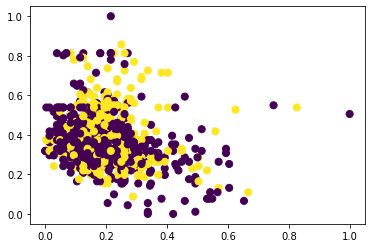

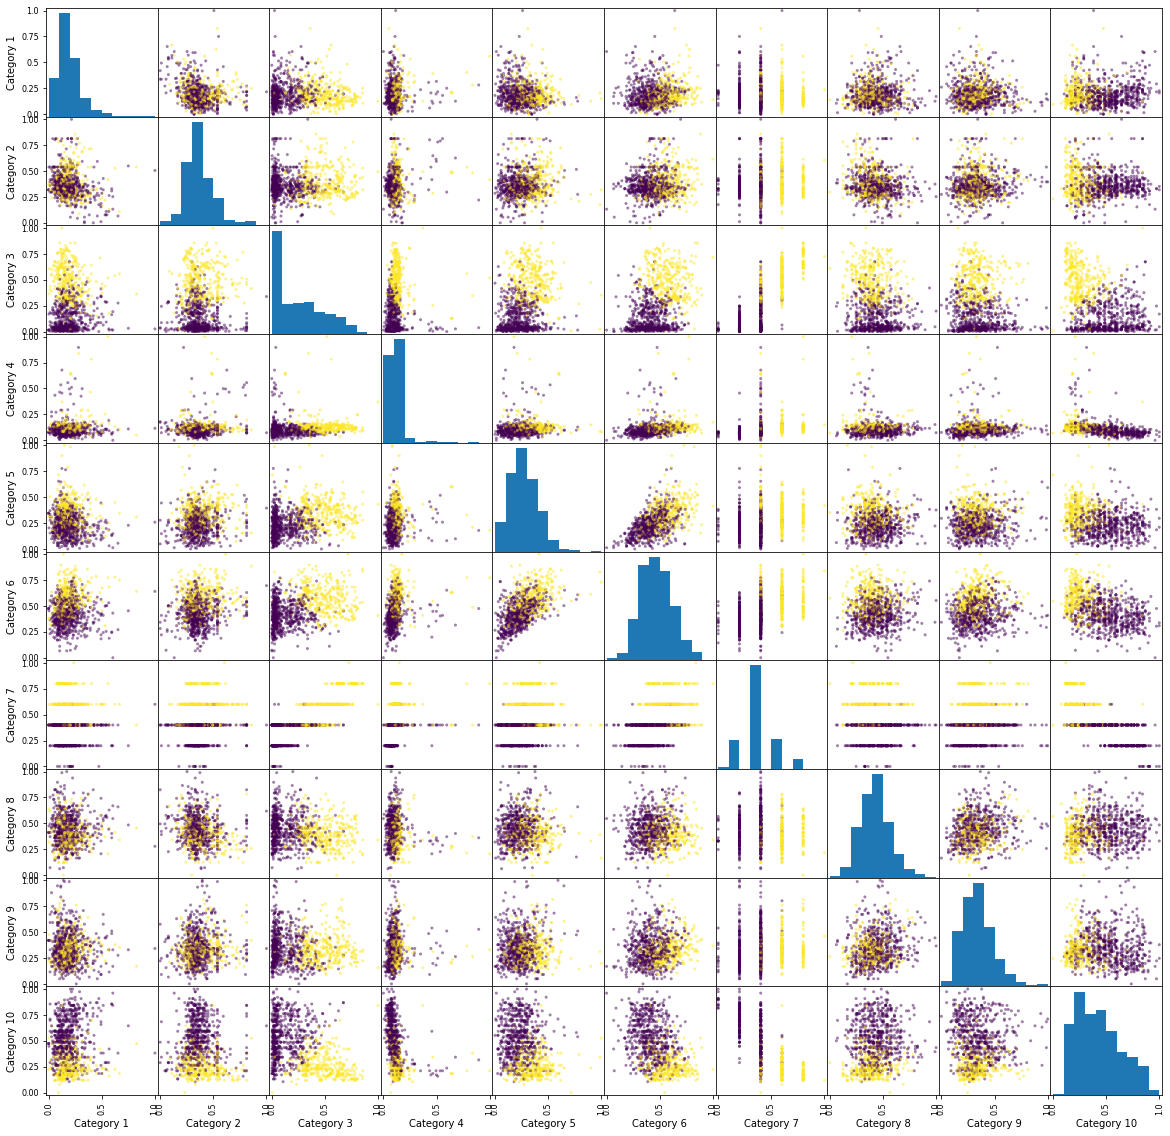

In [11]:
#Visualizing the clusters
plt.scatter(travel_cleaned.iloc[:, 0], travel_cleaned.iloc[:, 1],c=y_kmeans,  s=50, cmap='viridis')
pd.plotting.scatter_matrix(travel_cleaned, c=y_kmeans, figsize=(20, 20))

### First evaluation 

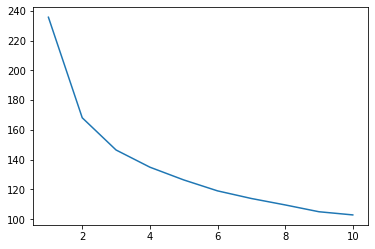

In [12]:
#Inertia
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(travel_cleaned)
                for k in range(1, 11)]
inertias = [model.inertia_ for model in kmeans_per_k]

#Plot
plt.plot(range(1,11), inertias)

#As we can see from the plot, the elbow is seen at k = 2 and k=3.

### Second evaluation 

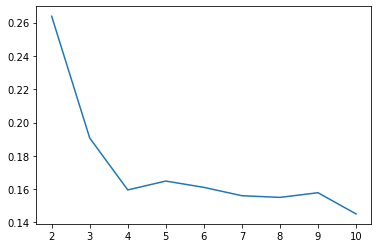

In [13]:
#Silhoutte score
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(travel_cleaned, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.plot(range(2,11), silhouette_scores)


#As we can see from the plot, the maximum silhoutte score is achieved at k = 2

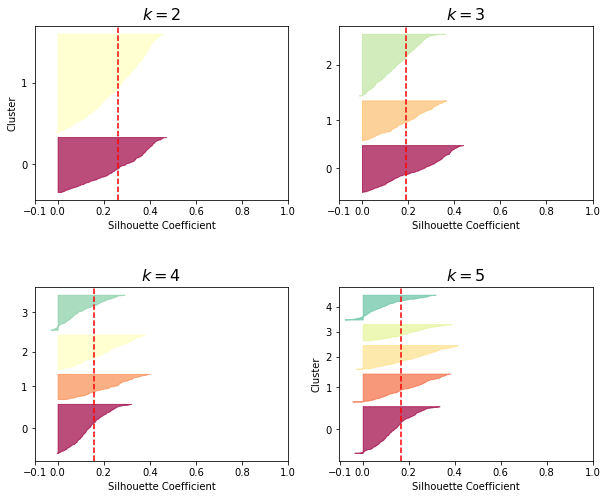

In [14]:
#Below code is reffered from tutorial 9.
#Plotting the silhoutte plot of the clusters
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(10, 8))

for k in (2, 3, 4, 5):
    plt.subplot(2, 2, k-1)
    plt.subplots_adjust(hspace=0.5)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(travel_cleaned, y_pred)

    padding = len(travel_cleaned) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2, 5):
        plt.ylabel("Cluster")
    
    if k in (2, 3, 4, 5):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

## 2.2 ICMLA Dataset

### Train K-means clustering

In [15]:
kmeans = KMeans(n_clusters=24).fit(tfidf_matrix)
y = kmeans.predict(tfidf_vectorizer.transform(icmla.merged.tolist())) #Transforming the merged column from the icmla dataset
#before predicting.
print(y)
print(tfidf_matrix)

[23 10  6 11 19 15 11  7  0 19  1 22  1 22 15  7  7  4 11  6  1  7  1  8
  8  1 17  8  8  1  6  4  6  4 14 13  2 22 18  0 20 15 16 22  7 22 16 19
  2 19 10 20  9  8 14 14  7 16  4 18  7 10  3  3 18  2  3  6  5  8 16  2
  2  6 17  5 21 17  6  5  5 19 19  4 13 12  9  8 14  7  7 21  7 13 12  4
 11  3 11 23 15 12  6  9 22]
  (0, 8681)	0.05721764925185309
  (0, 15016)	0.05721764925185309
  (0, 6235)	0.05721764925185309
  (0, 909)	0.05721764925185309
  (0, 1314)	0.05721764925185309
  (0, 15846)	0.05721764925185309
  (0, 6649)	0.05721764925185309
  (0, 10910)	0.05721764925185309
  (0, 5119)	0.05721764925185309
  (0, 1862)	0.05721764925185309
  (0, 11068)	0.05721764925185309
  (0, 8138)	0.05721764925185309
  (0, 11516)	0.05721764925185309
  (0, 8432)	0.05721764925185309
  (0, 8768)	0.05721764925185309
  (0, 17953)	0.05721764925185309
  (0, 19837)	0.05721764925185309
  (0, 872)	0.05721764925185309
  (0, 900)	0.05721764925185309
  (0, 902)	0.05721764925185309
  (0, 614)	0.05721764925185309
  (0,

### First evaluation

In [16]:
from sklearn import metrics
metrics.homogeneity_completeness_v_measure(icmla.session, y)

(0.570511146493292, 0.5865107564824343, 0.5784003280333087)

### Second evaluation 

In [17]:
#Completeness score
from sklearn import metrics
print(metrics.completeness_score(icmla.session, y))

0.5865107564824343


### Third evaluation

In [18]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(icmla.session, y)

0.04786218903806877



---


# 3. Hierachical Clustering

## 3.1 Travel Review Dataset

### Train Hierarchical clustering 

In [19]:
from sklearn.cluster import AgglomerativeClustering

lst=['euclidean','manhattan','cosine'] 
predict=[]
for n in lst:
    cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  #Optimal value chosen from the evalutions below.
    Y=cluster.fit_predict(travel_cleaned)#train
    predict.append(Y)
print(predict)
    

[array([0, 0, 2, 2, 0, 1, 1, 1, 0, 2, 2, 2, 0, 0, 0, 0, 3, 0, 0, 0, 3, 1,
       1, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2,
       2, 1, 2, 2, 2, 0, 1, 0, 2, 2, 1, 1, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2,
       3, 2, 3, 2, 2, 0, 2, 3, 0, 0, 2, 0, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 1, 0, 2, 1, 1, 2,
       0, 3, 2, 0, 0, 2, 0, 2, 2, 3, 0, 2, 0, 2, 2, 2, 2, 0, 1, 2, 3, 0,
       2, 0, 2, 2, 0, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 1, 0, 3, 3, 2, 2, 2, 3, 2, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 3, 0, 2, 2, 1, 0, 1, 0, 0, 1, 2, 2, 1, 3, 0,
       2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 3, 1, 3, 0, 2, 2, 1, 0, 1, 2, 0, 0,
       2, 3, 0, 1, 0, 1, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 3, 2, 0, 1, 0, 0,
       2, 2, 2, 2, 2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 1, 0, 2, 0, 0, 0, 2, 0,
       1, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0, 1, 0, 2, 2, 2, 3, 2, 0, 0, 2, 2,
       0, 2, 1, 1, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 1

In [20]:
#from sklearn.cluster import AgglomerativeClustering

    
#cluster = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='complete')  #Optimal value chosen from the evalutions below.
#S=cluster.fit_predict(travel_cleaned)#train
#S 

In [21]:
#visualization
#plt.scatter(travel_cleaned.iloc[:, 0], travel_cleaned.iloc[:, 1],c=Y,  s=50, cmap='viridis')
#pd.plotting.scatter_matrix(travel_cleaned, c=predict, figsize=(20, 20))

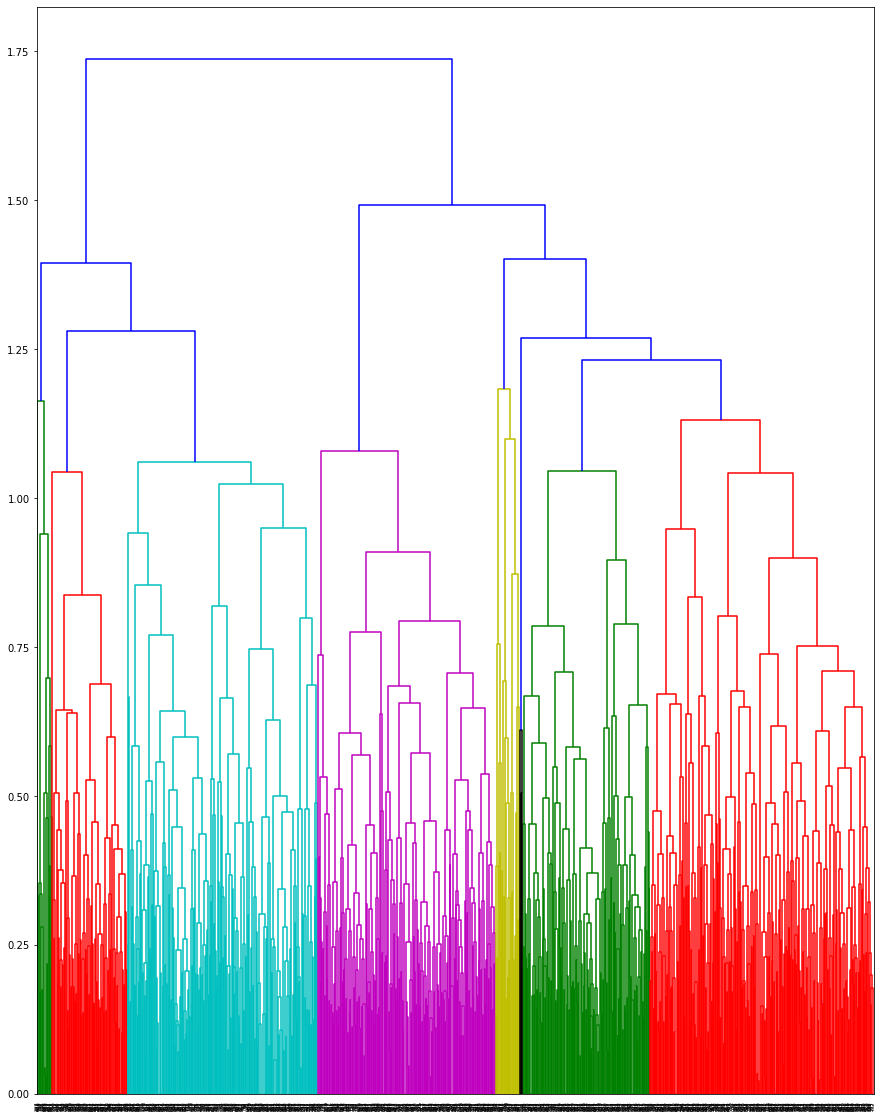

In [22]:
#distance metrics and dendrogram

from scipy.cluster.hierarchy import complete, dendrogram
linkage_matrix = complete(travel_cleaned)
linkage_matrix.shape
fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix);

### First evaluation 

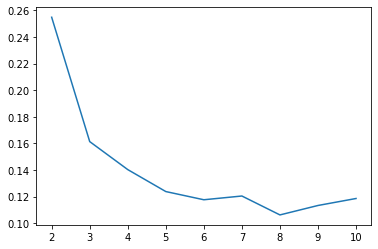

In [23]:
#ward
from sklearn.metrics import silhouette_score
cluster_range=range(2,11)
silhouette_value=[]

for n_clusters in cluster_range:
    
    cluster = AgglomerativeClustering(n_clusters, affinity='euclidean', linkage='ward').fit_predict(travel_cleaned)
    silhouette_avg = silhouette_score(travel_cleaned,cluster)# evaluation
    silhouette_value.append(silhouette_avg)

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "silhouette_value": silhouette_value } )    
clusters_df

plt.plot(range(2,11), silhouette_value)

In [24]:
#The highest silhoutte value
Highest_silhouette_value=clusters_df.loc[silhouette_value == max(silhouette_value),:]
Highest_silhouette_value

,num_clusters,silhouette_value
0,2,0.254788


In [25]:
#linkage =complete
from sklearn.metrics import silhouette_score
cluster_range=range(2,11)
silhouette_value=[]

cluster_range=range(2,11)

lst=["euclidean","manhattan","cosine"]
for n_clusters in cluster_range:
    for n in lst:
    
        cluster = AgglomerativeClustering(n_clusters, affinity=n, linkage='complete').fit_predict(travel_cleaned)
        silhouette_avg = silhouette_score(travel_cleaned,cluster)# evaluation
        silhouette_value.append(silhouette_avg)

clusters_df =max(silhouette_value)
print(clusters_df)
#plt.plot(range(2,11), silhouette_value)

0.2653061557220685


In [26]:
#linkage =average
from sklearn.metrics import silhouette_score
cluster_range=range(2,11)
silhouette_value=[]

cluster_range=range(2,11)

lst=["euclidean","manhattan","cosine"]
for n_clusters in cluster_range:
    for n in lst:
    
        cluster = AgglomerativeClustering(n_clusters, affinity=n, linkage='average').fit_predict(travel_cleaned)
        silhouette_avg = silhouette_score(travel_cleaned,cluster)# evaluation
        silhouette_value.append(silhouette_avg)

clusters_df =max(silhouette_value)
print(clusters_df)
#plt.plot(range(2,11), silhouette_value)

0.42100287072426956


In [27]:
#linkage =single 
from sklearn.metrics import silhouette_score
cluster_range=range(2,11)
silhouette_value=[]

cluster_range=range(2,11)

lst=["euclidean","manhattan","cosine"]
for n_clusters in cluster_range:
    for n in lst:
    
        cluster = AgglomerativeClustering(n_clusters, affinity=n, linkage='single').fit_predict(travel_cleaned)
        silhouette_avg = silhouette_score(travel_cleaned,cluster)# evaluation
        silhouette_value.append(silhouette_avg)

clusters_df =max(silhouette_value)
print(clusters_df)
#plt.plot(range(2,11), silhouette_value)

0.42100287072426956


### Second evaluation 

181.78077743469075


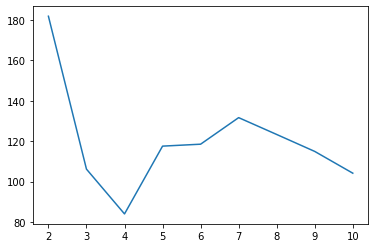

In [28]:
# linkage = complete
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import calinski_harabasz_score
cluster_range=range(2,11)
second=[]
lst=["euclidean","manhattan","cosine"]
for n_clusters in cluster_range:
   
    cluster = AgglomerativeClustering(n_clusters, affinity=lst[2], linkage='complete').fit_predict(travel_cleaned)
    calinski_avg = metrics.calinski_harabasz_score(travel_cleaned,cluster)
    second.append(calinski_avg)
    
clusters_df=max(second)
print(clusters_df)

#Highest_silhouette_value=clusters_df[second == max(second),:]
#Highest_silhouette_value




plt.plot(range(2,11), second)

In [29]:
#linkage= "average"
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import calinski_harabasz_score
cluster_range=range(2,11)
second=[]
lst=["euclidean","manhattan","cosine"]
for n_clusters in cluster_range:
    for n in lst:
        cluster = AgglomerativeClustering(n_clusters, affinity=n, linkage='average').fit_predict(travel_cleaned)
        calinski_avg = metrics.calinski_harabasz_score(travel_cleaned,cluster)
        second.append(calinski_avg)
    
clusters_df =max(second)
clusters_df


102.10927164100485

In [30]:
#linkage="single"
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import calinski_harabasz_score
cluster_range=range(2,11)
second=[]
lst=["euclidean","manhattan","cosine"]
for n_clusters in cluster_range:
   
    cluster = AgglomerativeClustering(n_clusters, affinity=lst[0], linkage='single').fit_predict(travel_cleaned)
    calinski_avg = metrics.calinski_harabasz_score(travel_cleaned,cluster)
    second.append(calinski_avg)
    
clusters_df=max(second)
clusters_df


9.342267163770236

## 3.2 ICMLA Dataset

### Train Hierarchical clustering 

In [31]:
#linkage= complete
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
cluster_range=range(2,11)
silhouette_value=[]

cluster_range=range(2,11)

lst=["euclidean","manhattan","cosine"]
for n_clusters in cluster_range:
    for n in lst:
    
        cluster_single = AgglomerativeClustering(n_clusters, affinity=n, linkage='single').fit_predict(travel_cleaned)
    print(cluster_single)
    cluster_single

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [32]:
#linkage= complete
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
cluster_range=range(2,11)
silhouette_value=[]

cluster_range=range(2,11)

lst=["euclidean","manhattan","cosine"]
for n_clusters in cluster_range:
    for n in lst:
    
        cluster_complete = AgglomerativeClustering(n_clusters, affinity=n, linkage='complete').fit_predict(travel_cleaned)
        print(cluster_complete)
        cluster_complete

[1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1
 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0
 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0
 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1
 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0
 0 0 0 1 1 0 0 0 0 1 0 0 

In [33]:
#linkage= complete
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
cluster_range=range(2,11)
silhouette_value=[]

cluster_range=range(2,11)

lst=["euclidean","manhattan","cosine"]
for n_clusters in cluster_range:
    for n in lst:
    
        cluster_average = AgglomerativeClustering(n_clusters, affinity=n, linkage='average').fit_predict(travel_cleaned)
    print(cluster_average)
    type(cluster_average)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

(105, 20706)


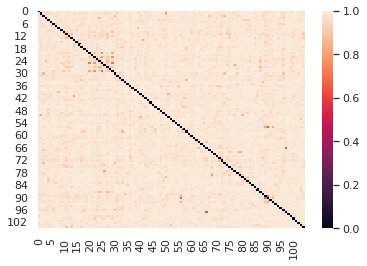

In [34]:
#visualization
import seaborn as sns
dist = 1-cosine_similarity(tfidf_matrix)

sns.set()
ax = sns.heatmap(dist)

print(tfidf_matrix.shape)

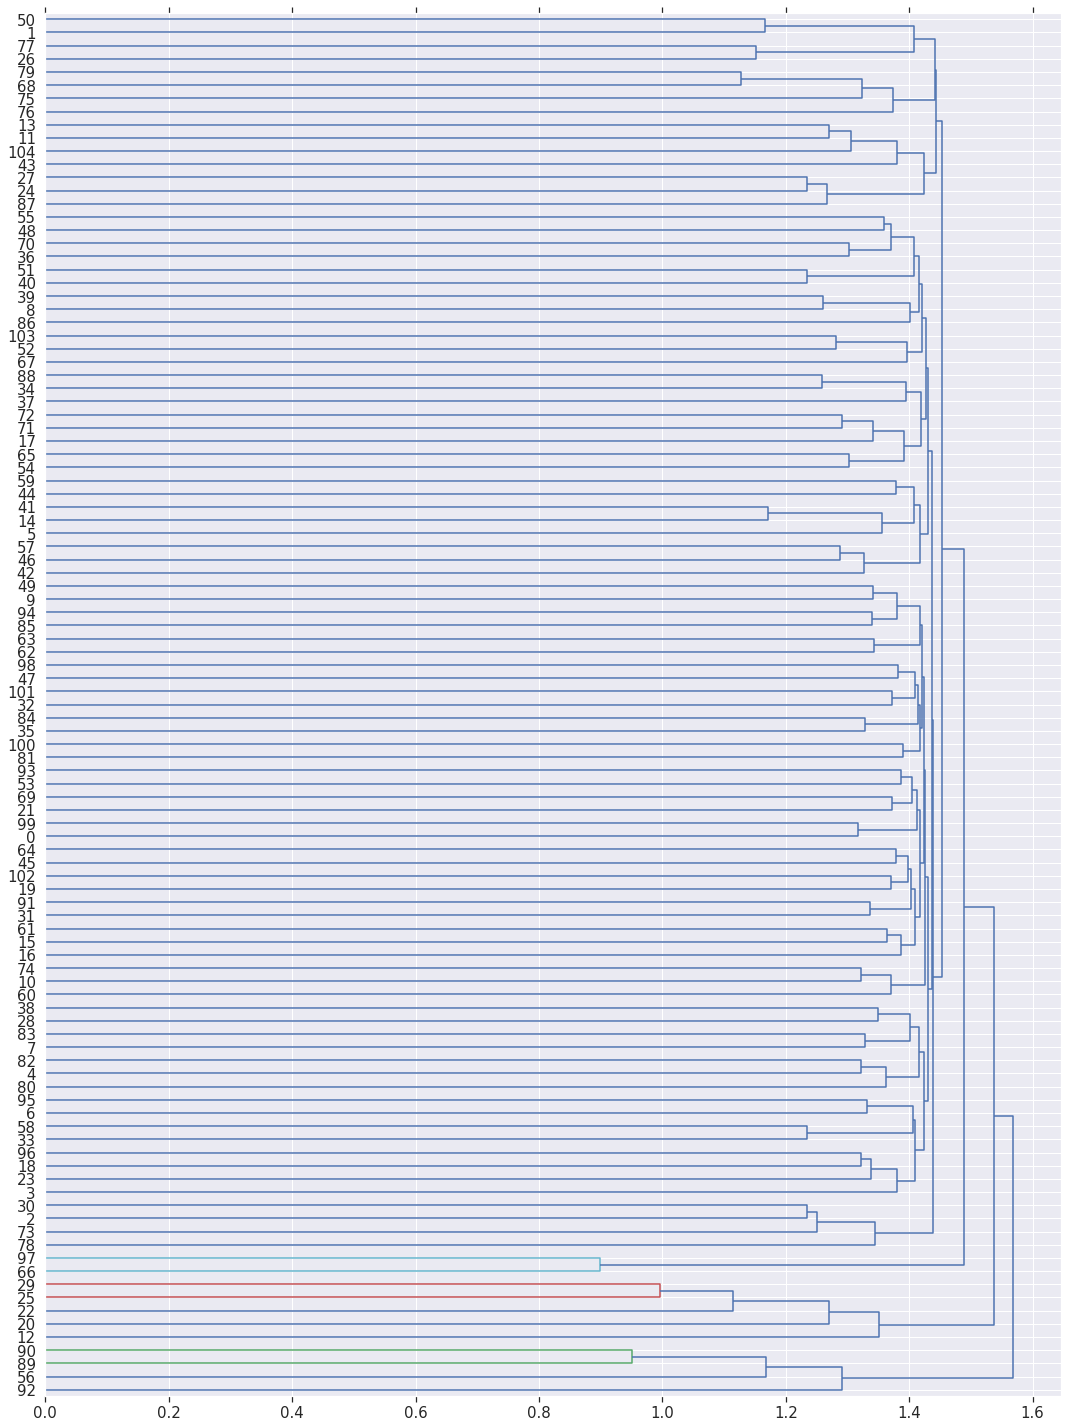

In [35]:
#Creating dendogram
###We'll use Scipy package for hierarchinal clustering
from scipy.cluster.hierarchy import complete, dendrogram

#use complete distance
linkage_matrix = complete(dist)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right");

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    labelsize=15
    )
plt.tick_params(\
    axis= 'y',          # changes apply to the y-axis
    labelsize=15
    )

plt.tight_layout() #show plot with tight layout

### First evaluation

In [47]:
#Homogeneity score
from sklearn.metrics.cluster import homogeneity_score
homogeneity_score(icmla.session, y)

0.570511146493292

### Second evaluation 

In [48]:
#Completeness score
from sklearn import metrics
metrics.completeness_score(icmla.session, y)

0.5865107564824343

### Third evaluation

In [50]:
#Adjusted rand index
from sklearn import metrics
metrics.adjusted_rand_score(icmla.session, y)


0.04786218903806877



---


# 4. DBSCAN Clustering

## 4.1 Travel Review Dataset

### Train DBSCAN clustering 

In [39]:
from sklearn.cluster import DBSCAN
#DBSCAN using euclidean distance
dbscan_e = DBSCAN(eps=0.3, min_samples=4) #Parameter values selected using the evaluation section below.
dbscan_e.fit(travel_cleaned)
dbscan_e.labels_

#DBSCAN using manhattan distance
dbscan_manhattan = DBSCAN(eps=0.3, min_samples=4, metric = 'manhattan')
dbscan_manhattan.fit(travel_cleaned)

#DBSCAN using cosine distance
dbscan_cosine = DBSCAN(eps=0.3, min_samples=4, metric = 'cosine')
dbscan_cosine.fit(travel_cleaned)

DBSCAN(eps=0.3, metric='cosine', min_samples=4)

### First evaluation

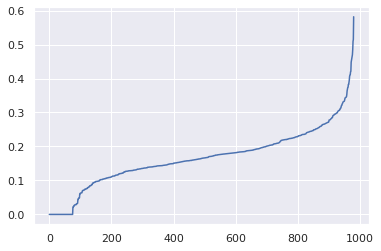

In [40]:
#below code is reffered from https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
#Evaluating the best epsilon value
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(travel_cleaned)
distances, indices = nbrs.kneighbors(travel_cleaned)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

#Best value according to the plot for epsilon is 0.3 (maximum curvature in the plot)

### Second evaluation 

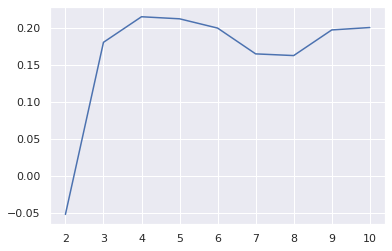

In [41]:
#Silhoutte score for euclidean
dbscan_per_min_sample = [DBSCAN(eps=0.3, min_samples=k).fit(travel_cleaned)
                for k in range(1, 11)]


silhouette_scores = [silhouette_score(travel_cleaned, model.labels_)
                     for model in dbscan_per_min_sample[1:]]

plt.plot(range(2,11), silhouette_scores)

#We can see from the plot below that the highest silhoutte score is at epsilon value 4.

In [42]:
#dbscan_manhattan is better evaluation metrics

from sklearn.metrics import davies_bouldin_score


print(davies_bouldin_score(travel_cleaned,dbscan_manhattan.labels_))
#print(davies_bouldin_score(travel_cleaned,dbscan_cosine.labels_))
print(davies_bouldin_score(travel_cleaned,dbscan_e.labels_))

1.4221657382496105
6.225321508254232


## 4.2 ICMLA Dataset

### Train DBSCAN clustering 

In [43]:
# Please comment your code

from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=4).fit(dist)

labels = db.labels_

In [44]:
db.labels_[:20]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1])

### Second evaluation 

In [45]:
db.core_sample_indices_[:20]

array([], dtype=int64)